In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\plant_growth_data.csv")
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [4]:
df.shape

(193, 7)

In [5]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


EDA

In [6]:
fig=px.histogram(df,x="Sunlight_Hours",title="Distribution of sunlight hours")
fig.show()

In [7]:
fig=px.histogram(df,x="Temperature",title="Distribution of Temperature")
fig.show()

In [8]:
fig=px.histogram(df,x="Humidity",title="Distribution of Humidity")
fig.show()

In [9]:
fig=px.box(df,x="Soil_Type",y="Temperature",color="Growth_Milestone",title="Distribution of Temperature acc.to soil")
fig.show()

In [10]:
fig=px.box(df,x="Soil_Type",y="Humidity",color="Growth_Milestone",title="Distribution of Humidity acc.to soil")
fig.show()

In [11]:
fig=px.box(df,x="Soil_Type",y="Sunlight_Hours",color="Growth_Milestone",title="Distribution of Sunlight hours acc.to soil")
fig.show()

In [12]:
dr=df["Growth_Milestone"].value_counts().reset_index()
dr.columns=["Growth_Milestone","count"]

fig=px.pie(dr,names="Growth_Milestone",values="count",title="Growth Milestone's distribution")
fig.show()

In [13]:
d1 = df.groupby(["Soil_Type", "Growth_Milestone"]).size().reset_index(name='count')

fig = px.bar(d1, x="Soil_Type", y="count", color="Growth_Milestone", title="Soil Type vs Growth Milestone")
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

In [14]:
d1 = df.groupby(["Fertilizer_Type", "Growth_Milestone"]).size().reset_index(name='count')

fig = px.bar(d1, x="Fertilizer_Type", y="count", color="Growth_Milestone", title="Fertilizer Type vs Growth Milestone")
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

In [15]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

In [16]:
d1 = df.groupby(["Water_Frequency", "Growth_Milestone"]).size().reset_index(name='count')

fig = px.bar(d1, x="Water_Frequency", y="count", color="Growth_Milestone", title="Water Frequency vs Growth Milestone")
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

In [17]:
fig=px.scatter(df,x="Temperature",y="Humidity",color="Growth_Milestone",title="Temperature vs Humidity")
fig.show()

In [18]:
fig=px.scatter_3d(df,x="Sunlight_Hours",y="Temperature",z="Humidity",color="Growth_Milestone",title="3d plot of Sunlight_Hours,Temperature,humidity vs growth milestone ")
fig.show()

DATA PREPROCESSING

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [20]:
le=LabelEncoder()
df["Soil_Type"]=le.fit_transform(df["Soil_Type"])
df["Water_Frequency"]=le.fit_transform(df["Water_Frequency"])
df["Fertilizer_Type"]=le.fit_transform(df["Fertilizer_Type"])

In [21]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

In [22]:
col=['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone']
mn=MinMaxScaler()
df=mn.fit_transform(df)

df=pd.DataFrame(df,columns=col)

In [23]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0.5,0.197110,0.0,0.0,0.842403,0.632107,0.0
1,1.0,0.000000,1.0,1.0,0.699613,0.445280,1.0
2,0.5,0.826360,0.0,0.5,0.406885,0.287137,0.0
3,0.5,0.715554,0.0,0.5,0.166541,0.323255,0.0
4,1.0,0.738153,0.0,1.0,0.149349,0.673551,0.0


FEATURE SELECTION

Corralation

In [24]:
fig = px.imshow(
  df.corr(),
  text_auto=True,
  aspect="auto",
  color_continuous_scale="Inferno_r",
)

fig.show()

Information Gain

In [25]:
import matplotlib.pyplot as plt

<Axes: >

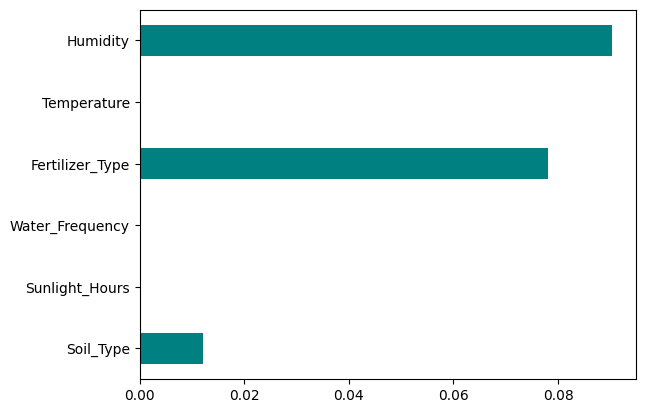

In [26]:
X=df.drop("Growth_Milestone",axis=1)
Y=df["Growth_Milestone"]

from sklearn.feature_selection import mutual_info_classif
fi=mutual_info_classif(X,Y)
imp=pd.Series(fi,df.columns[0:len(df.columns)-1])
imp.plot(kind='barh',color="teal")

Randome Forest

<Axes: >

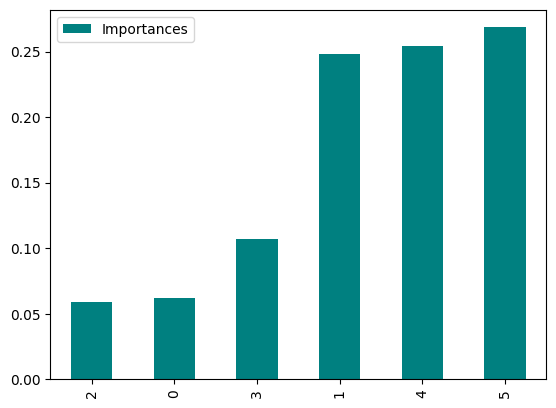

In [27]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier()

mod.fit(X,Y)

importances=mod.feature_importances_

dff=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
dff.set_index("Importances")

dff=dff.sort_values("Importances")

dff.plot.bar(color="teal")

In [29]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

combo 1

In [30]:
x=df.drop("Growth_Milestone",axis=1)
y=df["Growth_Milestone"]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
mod.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
y_pred=mod.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5641025641025641

combo 2

In [52]:
x=df[['Temperature', 'Humidity','Sunlight_Hours','Fertilizer_Type']]
y=df["Growth_Milestone"]

In [53]:
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [51]:
import xgboost as xgb

In [58]:
model = xgb.XGBClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)


In [60]:
accuracy_score(y_test,predictions)

0.46153846153846156

combo 3

In [62]:
x=df[['Temperature', 'Humidity','Sunlight_Hours','Fertilizer_Type','Soil_Type']]
y=df["Growth_Milestone"]

In [63]:
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.5897435897435898

combo 4

In [67]:
x=df[['Fertilizer_Type','Soil_Type','Water_Frequency']]
y=df["Growth_Milestone"]

In [68]:
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [70]:
model = xgb.XGBClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [71]:
accuracy_score(y_test,predictions)

0.46153846153846156